# Código 1

## Dataset "Clasificación binaria de películas"

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000) 

In [3]:
#Print an example of data and its label 
print(train_data[5]) 
print(train_labels[5]) 

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
0


In [4]:
#Print max value of index words 
max([max(sequence) for sequence in train_data]) 

9999

In [5]:
#Decoding an example of data (converting to original words) 
word_index = imdb.get_word_index() 
reverse_word_index  = dict([(value,key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[17]]) 

In [6]:
#Decode the sample number 17 
print(decoded_review) 

? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ? 

In [7]:
#One hot encoding 
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences): 
    results[i, sequence] = 1. 
  return results 
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [9]:
#Print an example of one hot encoded sample 
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [10]:
#Vectorizing labels 
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32') 

In [11]:
from keras import models 
from keras import layers

In [12]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop', 
loss='binary_crossentropy', 
metrics=['accuracy']) 

In [14]:
x_val = x_train[:10000] 
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] 
partial_y_train = y_train [10000:] 
history = model.fit(partial_x_train, 
partial_y_train, 
epochs=20, 
batch_size=512, 
validation_data=(x_val, y_val)) 

Epoch 1/20


30/30 [==============================] - 4s 34ms/step - loss: 0.5605 - accuracy: 0.7658 - val_loss: 0.4384 - val_accuracy: 0.8564
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3603 - accuracy: 0.8817 - val_loss: 0.3393 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2676 - accuracy: 0.9098 - val_loss: 0.3003 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2187 - accuracy: 0.9252 - val_loss: 0.2814 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1836 - accuracy: 0.9390 - val_loss: 0.3027 - val_accuracy: 0.8788
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1595 - accuracy: 0.9473 - val_loss: 0.3146 - val_accuracy: 0.8753
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1381 - accuracy: 0.9554 - val_loss: 0.2859 - val_accuracy: 0.8857
Epoch 8/20
30/30 

In [15]:
#Consulting the history 
history_dict = history.history 
print( history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [16]:
#Plotting the loss 
import matplotlib.pyplot as plt

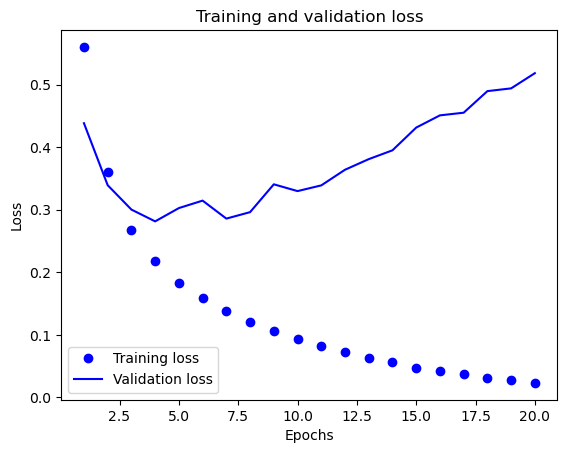

In [17]:
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, 20 + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

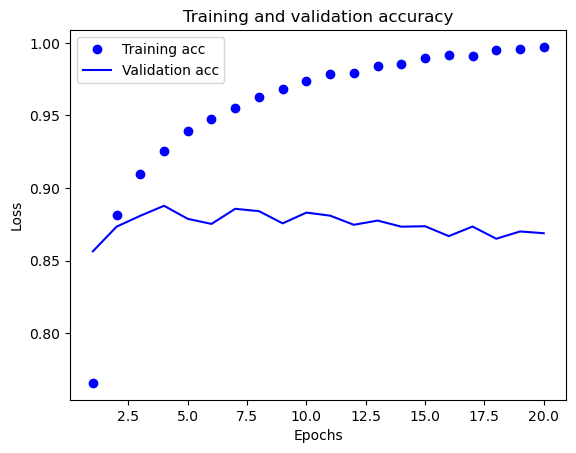

In [18]:
plt.clf() 
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

In [19]:
model = models.Sequential() 
model.add(layers.Dense (16, activation='relu', input_shape=(10000,))) 
model.add(layers. Dense (16, activation='relu')) 
model.add(layers. Dense (1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', 
loss='binary_crossentropy', 
metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test) 

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4566 - accuracy: 0.8116
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.9267
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2909 - accuracy: 0.8844


In [20]:
print(results)

[0.29088544845581055, 0.8843600153923035]


In [21]:
model.predict(x_test) 

782/782 [==============================] - 1s 1ms/step


array([[0.22721358],
       [0.99885947],
       [0.85689974],
       ...,
       [0.10168487],
       [0.09674018],
       [0.58318603]], dtype=float32)